# <center>     Fraud Transaction Detection  </center>

 <center>

### Objective

Developed and implemented a robust machine learning model for Fraud Transaction Detection, contributing to enhanced security in financial transactions. Leveraged cutting-edge algorithms to identify potentially fraudulent credit card transactions, minimizing false positives, and ensuring a more secure digital financial ecosystem. 💻🔒

</center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

In [2]:
df =pd.read_csv ('E:\TechnoHacks project\\4.creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Preprocessing

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.duplicated().sum()

1081

In [11]:
df1 = df.drop_duplicates()

In [12]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [13]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [14]:
categorical_columns= df1.columns[df1.dtypes == 'object']

In [15]:
categorical_columns

Index([], dtype='object')

In [16]:
numerical_columns = df1.columns[df1.dtypes == 'int64']

In [17]:
numerical_columns

Index(['Class'], dtype='object')

# Data Visualization

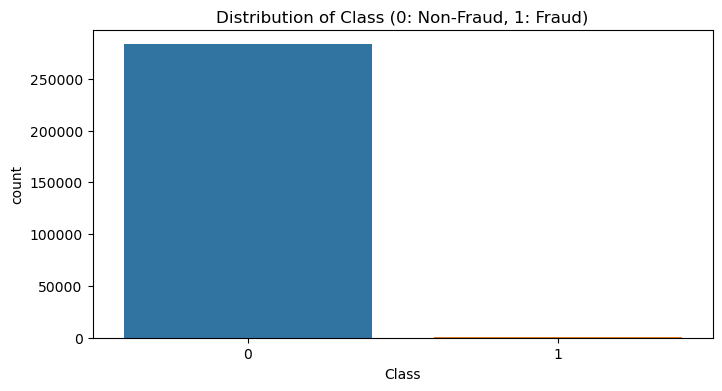

In [18]:
# Distribution of the 'Class' variable (fraud vs. non-fraud)
plt.figure(figsize=(8, 4))
sns.countplot(x='Class', data=df1)
plt.title('Distribution of Class (0: Non-Fraud, 1: Fraud)')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


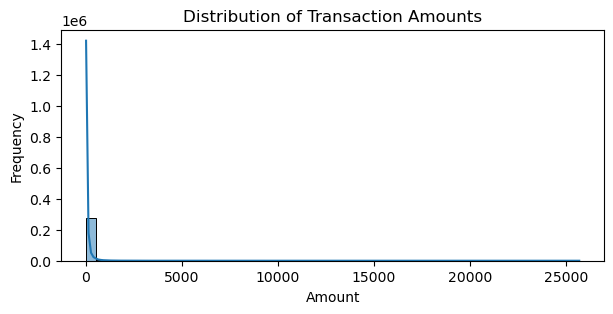

In [19]:

plt.figure(figsize=(7, 3))
sns.histplot(df1['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

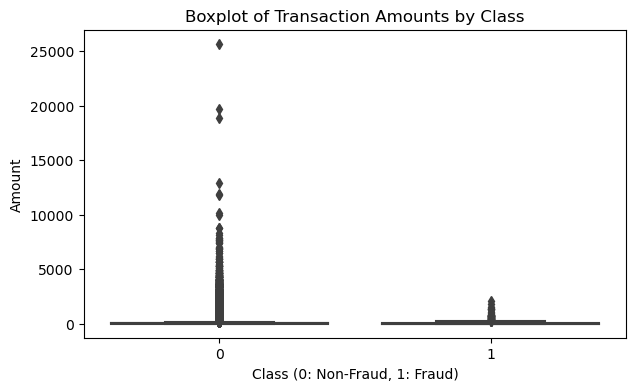

In [20]:

plt.figure(figsize=(7, 4))
sns.boxplot(x='Class', y='Amount', data=df1)
plt.title('Boxplot of Transaction Amounts by Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


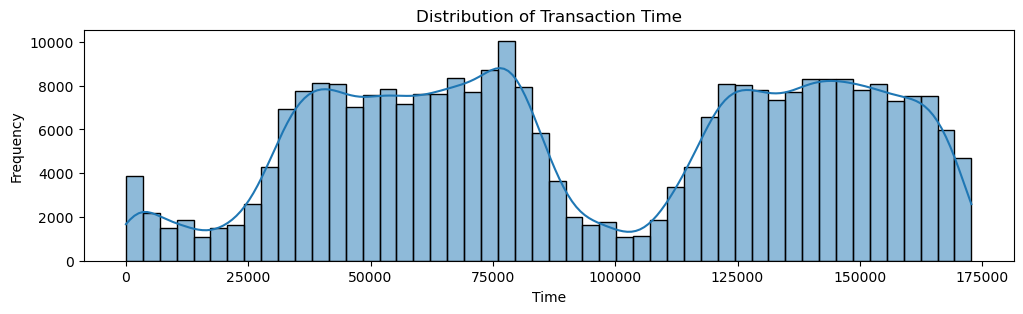

In [21]:

plt.figure(figsize=(12, 3))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


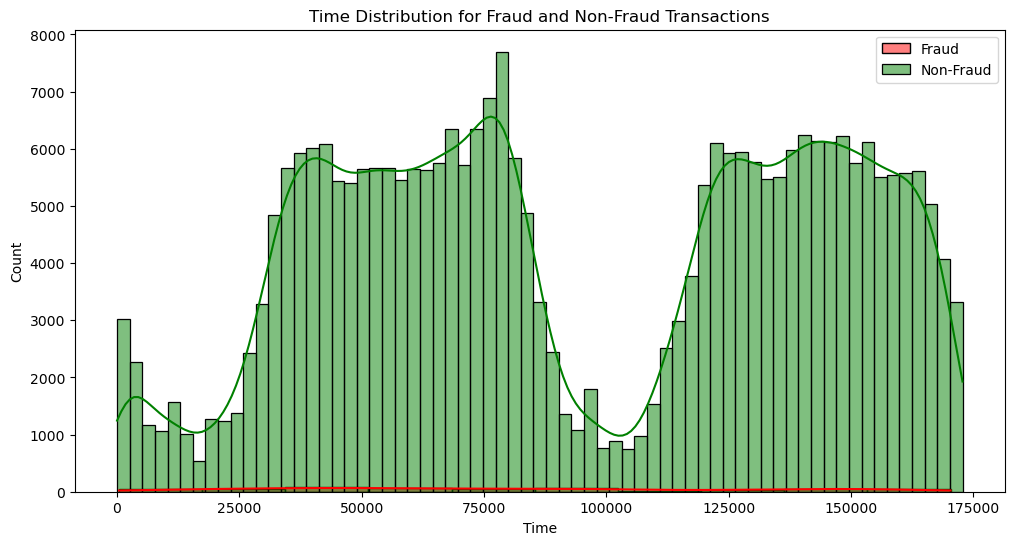

In [22]:

plt.figure(figsize=(12, 6))
sns.histplot(x='Time', data=df[df['Class'] == 1], kde=True, label='Fraud', color='r')
sns.histplot(x='Time', data=df[df['Class'] == 0], kde=True, label='Non-Fraud', color='g')
plt.title('Time Distribution for Fraud and Non-Fraud Transactions')
plt.legend()
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

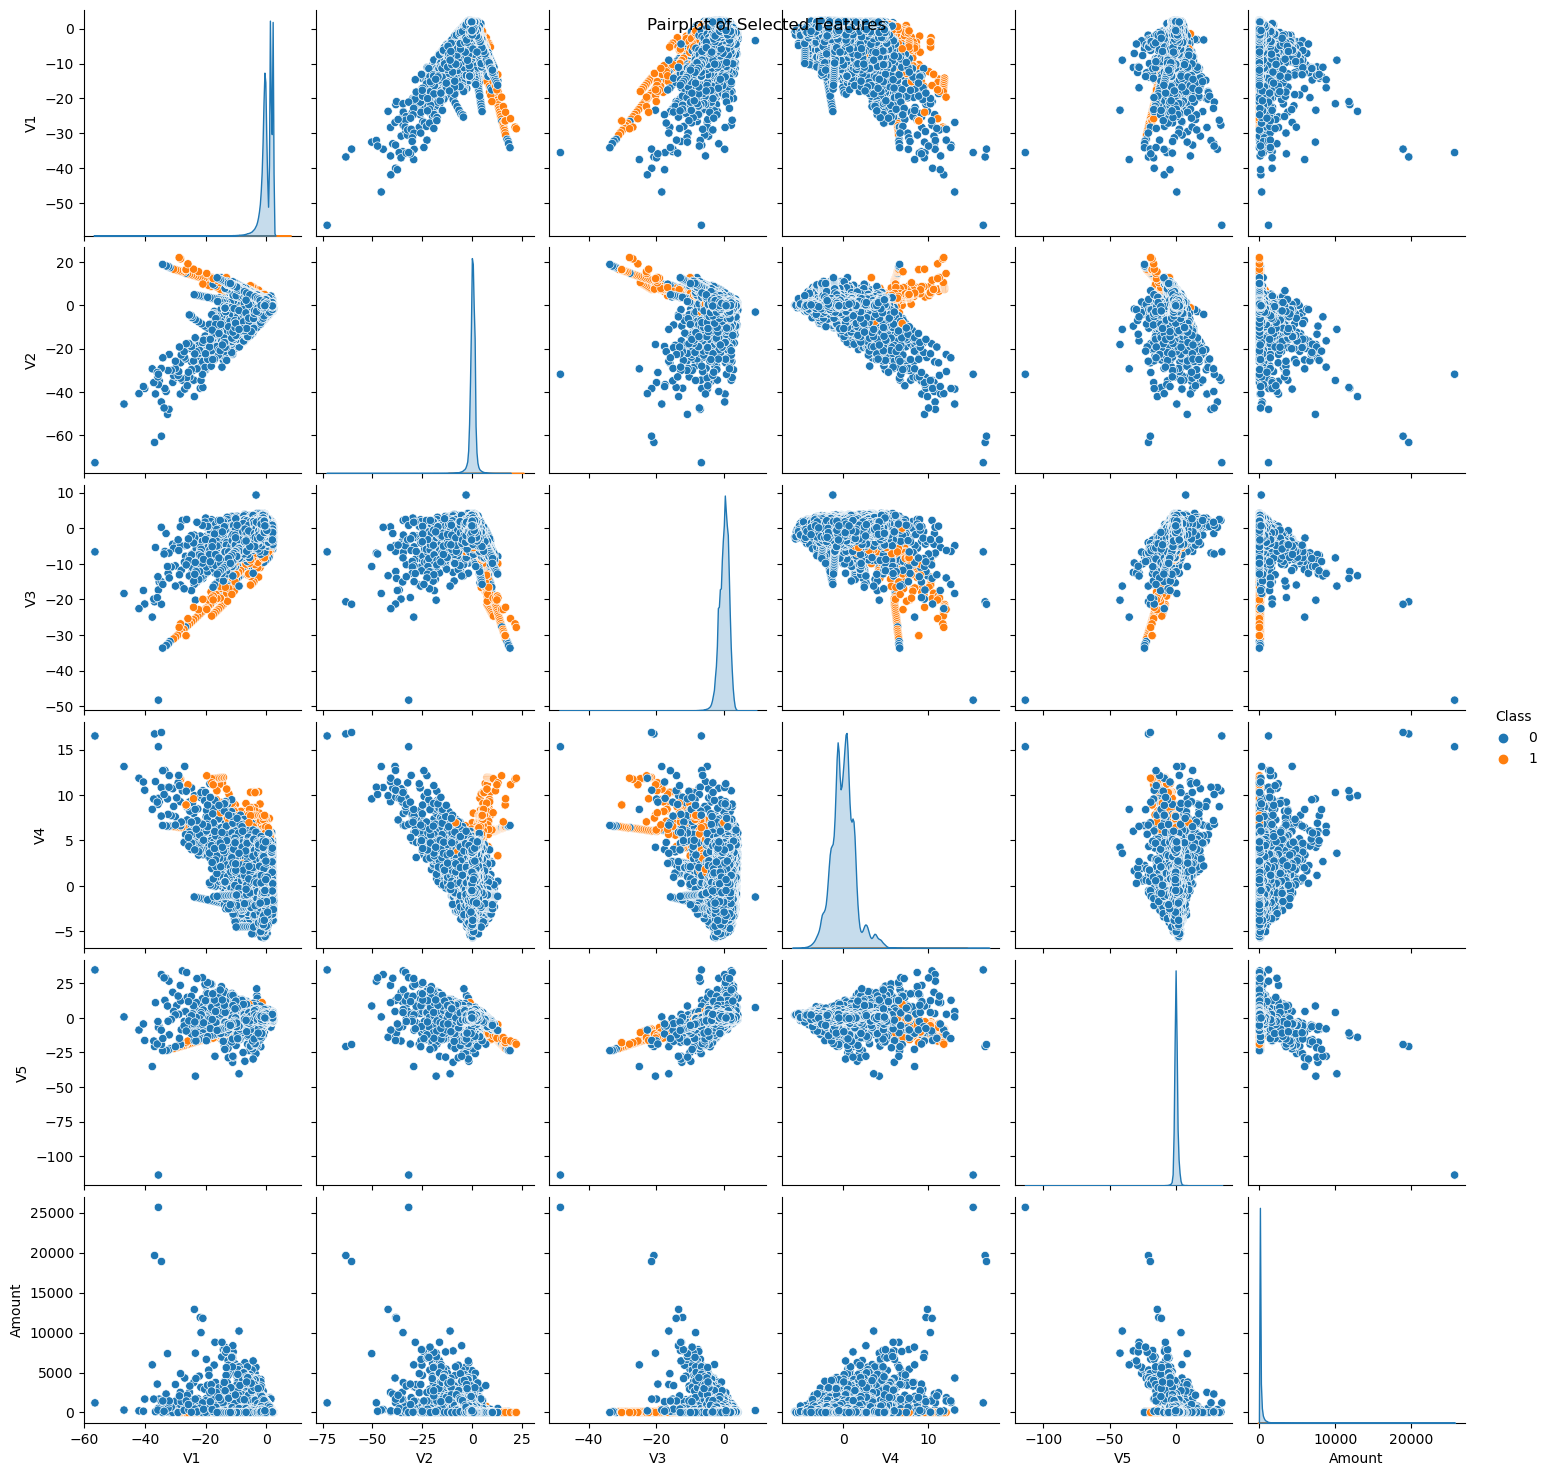

In [23]:

selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features')
plt.show()

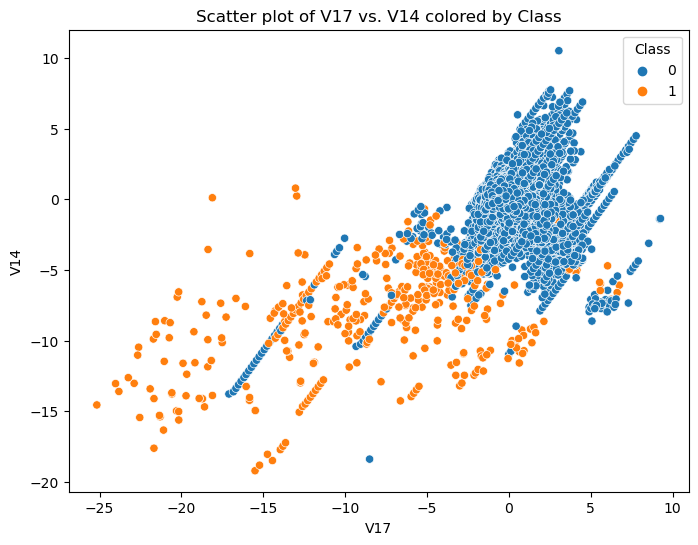

In [24]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='V17', y='V14', hue='Class', data=df)
plt.title('Scatter plot of V17 vs. V14 colored by Class')
plt.show()

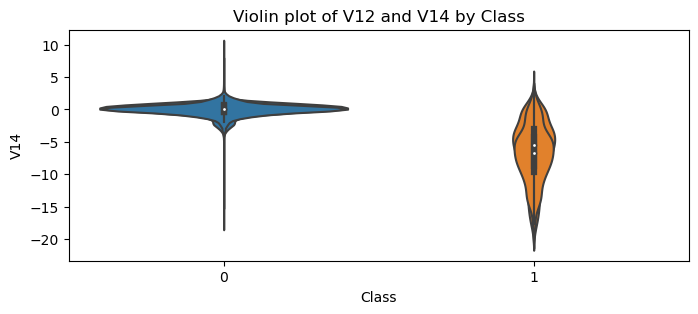

In [25]:

plt.figure(figsize=(8, 3))
sns.violinplot(x='Class', y='V12', data=df)
sns.violinplot(x='Class', y='V14', data=df)
plt.title('Violin plot of V12 and V14 by Class')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

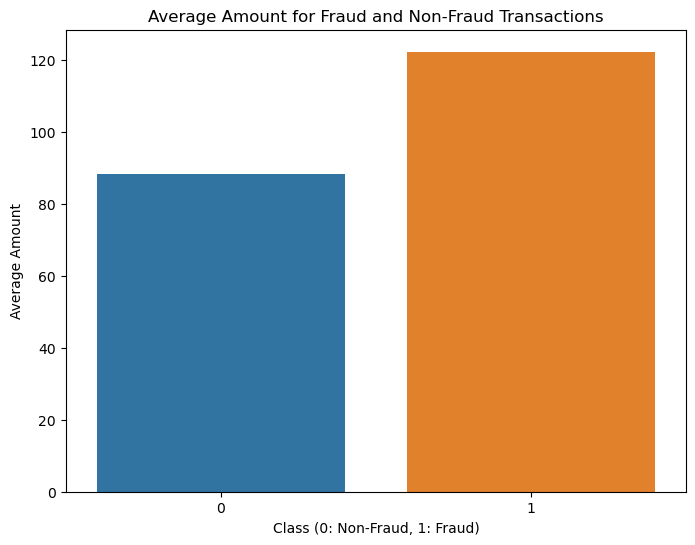

In [26]:

average_amount_by_class = df.groupby('Class')['Amount'].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=average_amount_by_class.index, y=average_amount_by_class.values)
plt.title('Average Amount for Fraud and Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Average Amount')
plt.show

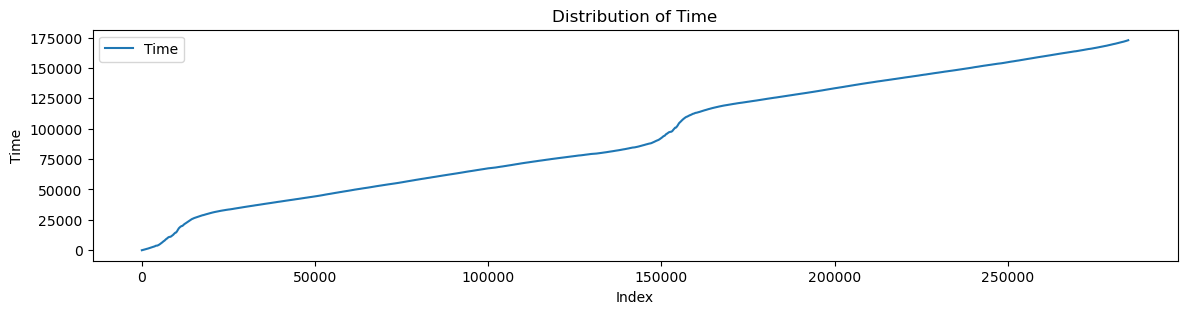

In [27]:

plt.figure(figsize=(14, 3))
plt.plot(df['Time'], label='Time')
plt.title('Distribution of Time')
plt.xlabel('Index')
plt.ylabel('Time')
plt.legend()
plt.show()

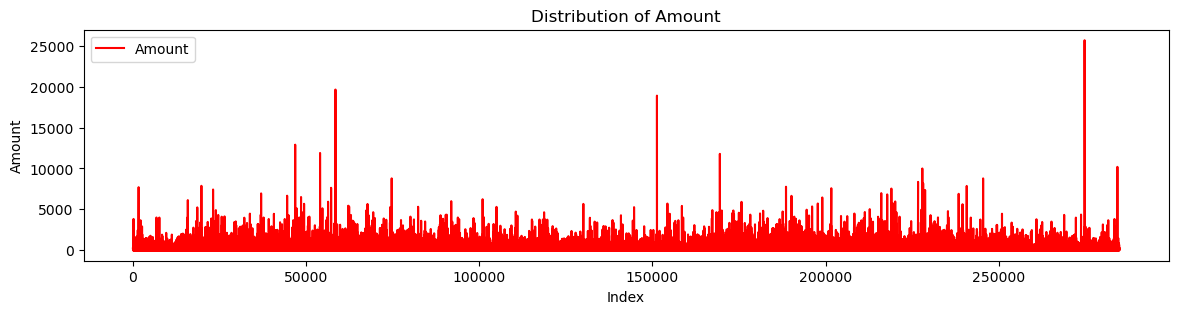

In [28]:

plt.figure(figsize=(14, 3))
plt.plot(df['Amount'], label='Amount', color='red')
plt.title('Distribution of Amount')
plt.xlabel('Index')
plt.ylabel('Amount')
plt.legend()
plt.show()


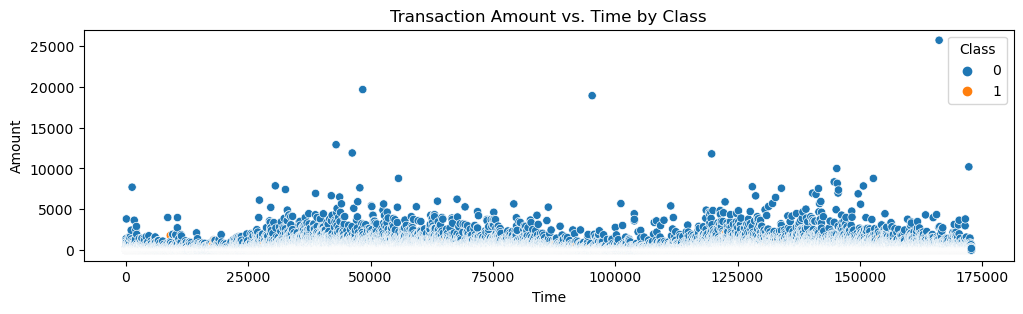

In [29]:

plt.figure(figsize=(12, 3))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df)
plt.title('Transaction Amount vs. Time by Class')
plt.show()

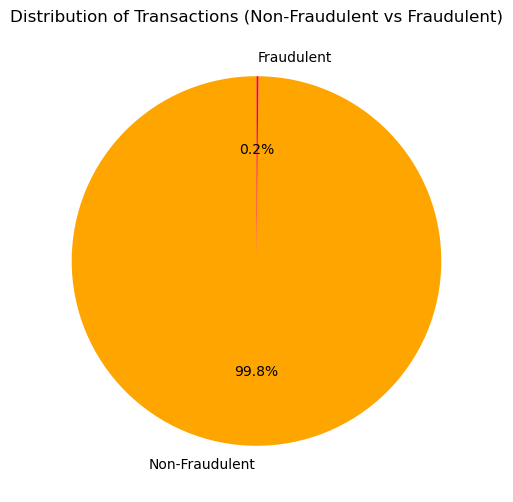

In [30]:

fraud_counts = df['Class'].value_counts()
labels = ['Non-Fraudulent', 'Fraudulent']


plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors = ['Orange','Red'])
plt.title('Distribution of Transactions (Non-Fraudulent vs Fraudulent)')
plt.show()


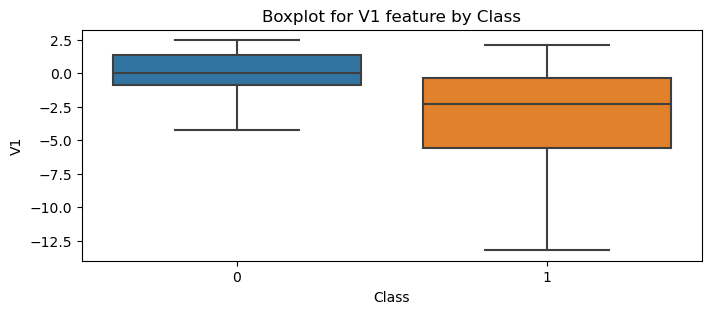

In [31]:

selected_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']
plt.figure(figsize=(8, 3))
sns.boxplot(x='Class', y='V1', data=df1, showfliers=False)
plt.title('Boxplot for V1 feature by Class')
plt.show()

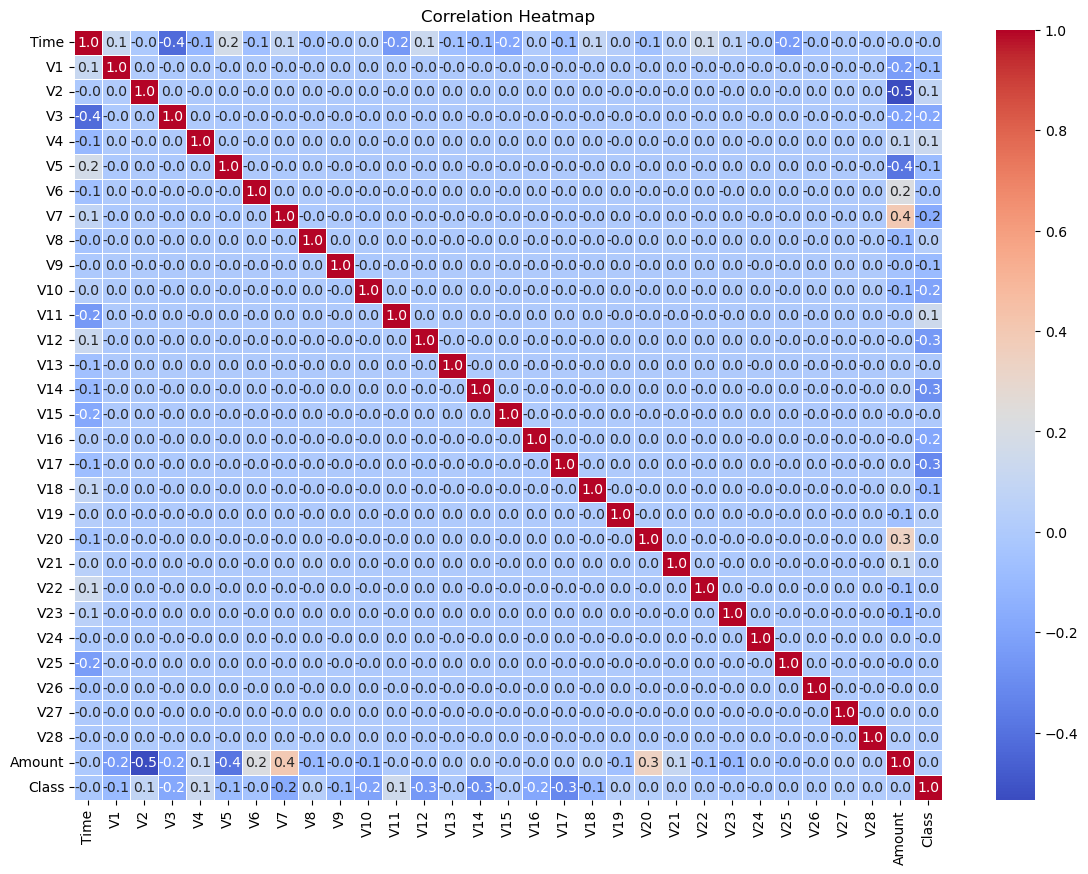

In [32]:
# Heatmap to visualize correlations between features
plt.figure(figsize=(14, 10))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

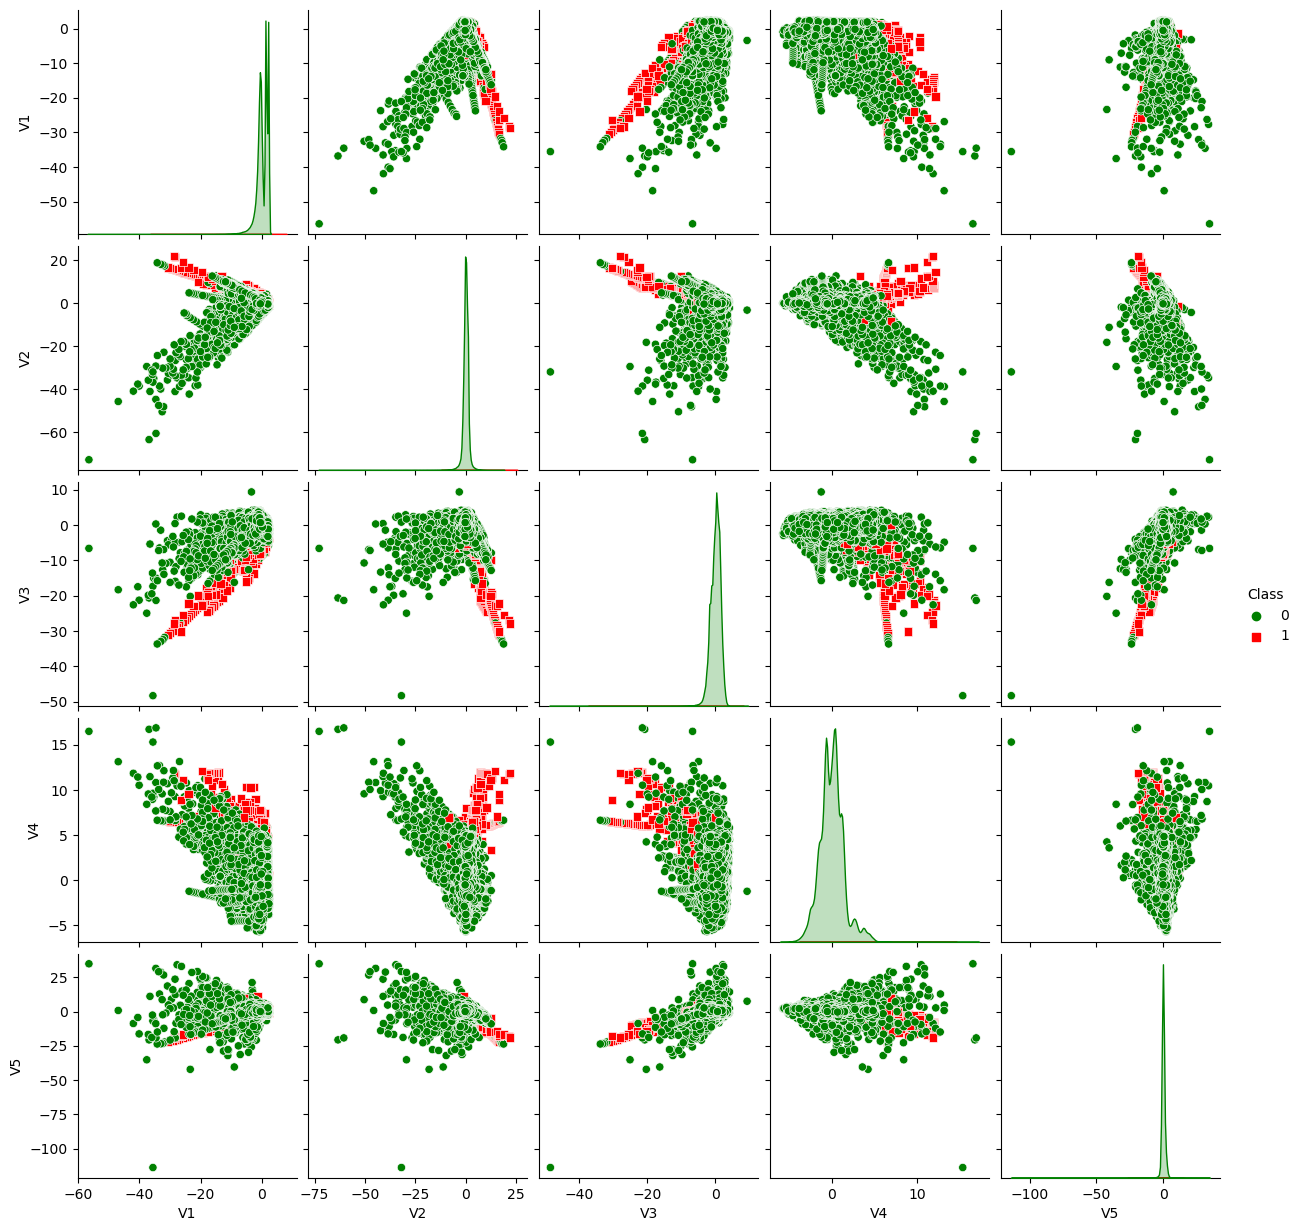

In [33]:
# pair plot to visualize relationships between features
sns.pairplot(df, vars=["V1", "V2", "V3", "V4", "V5"], hue="Class", markers=["o", "s"], palette={0: 'g', 1: 'r'})
plt.show()

Text(0.5, 1.0, 'Box plot of Time')

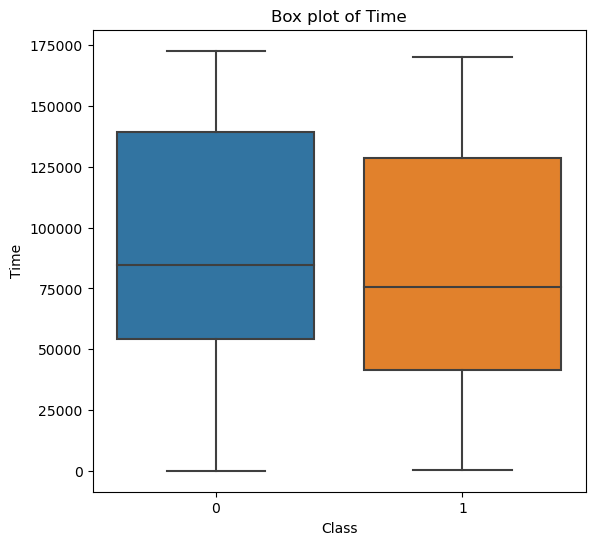

In [34]:
# Box plot for Time and Amount to identify potential outliers
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="Time", data=df, showfliers=False)
plt.title('Box plot of Time')


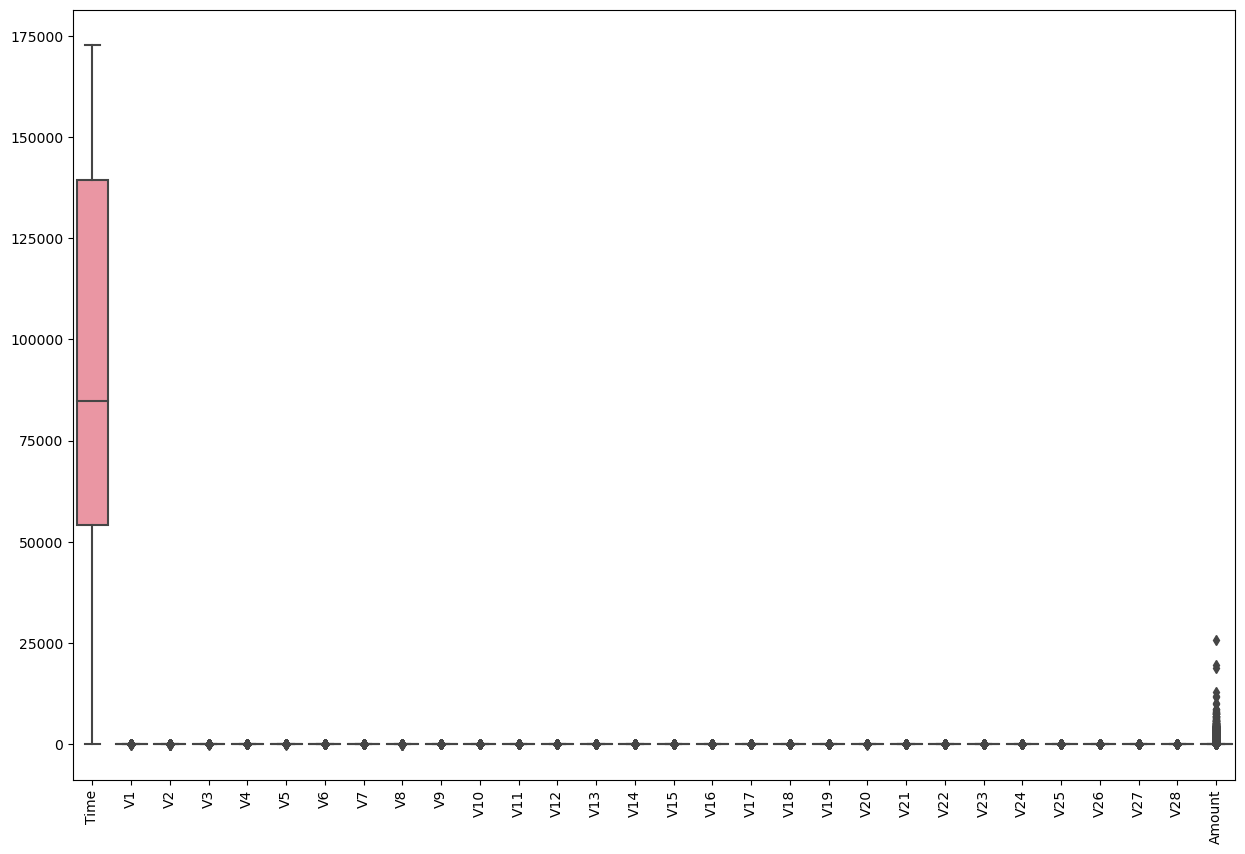

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()


Outlier Found at Amount column

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

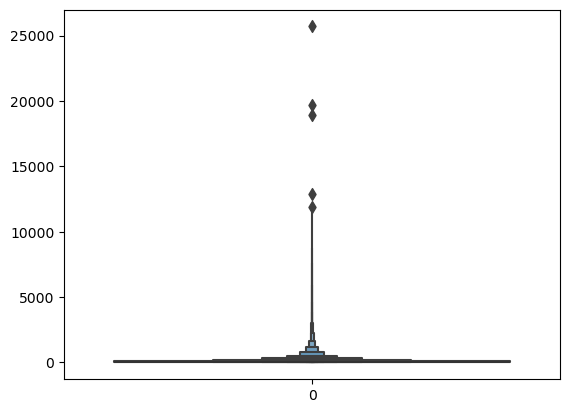

In [36]:

sns.boxenplot(df1.Amount)


In [37]:
# Identify outliers
Q1 = df1['Amount'].quantile(0.25)
Q3 = df1['Amount'].quantile(0.75)
IQR = Q3 - Q1

outliers = (df1['Amount'] < (Q1 - 1.5 * IQR)) | (df1['Amount'] > (Q3 + 1.5 * IQR))

print("Number of outliers:", outliers.sum())

Number of outliers: 31685


In [38]:
df1_no_outliers = df1[~outliers]

# Optionally, you can reset the index if needed
df1_no_outliers = df1_no_outliers.reset_index(drop=True)

In [39]:
df1_no_outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252036,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
252037,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
252038,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
252039,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


# Model Selection

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df1_no_outliers.drop('Class', axis=1)
y = df1_no_outliers['Class']


In [42]:
X_train, X_test, y_train ,y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

# Model Training

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model =RandomForestClassifier()

In [45]:
model.fit(X_train,y_train)

RandomForestClassifier()

# Model Evaluation

In [46]:
y_predicted = model.predict(X_test)


In [47]:
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
model.score(X_train, y_train)  

1.0

# Model Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.9992858418139617
Confusion Matrix:
[[50308    17]
 [   19    65]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.79      0.77      0.78        84

    accuracy                           1.00     50409
   macro avg       0.90      0.89      0.89     50409
weighted avg       1.00      1.00      1.00     50409



# Model Logistic Regression

In [50]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
class_report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.9990676268126724
Confusion Matrix:
[[50315    10]
 [   37    47]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50325
           1       0.82      0.56      0.67        84

    accuracy                           1.00     50409
   macro avg       0.91      0.78      0.83     50409
weighted avg       1.00      1.00      1.00     50409



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Now , our Model is ready

# Let's identify potentially fraudulent transactions

In [51]:
# Set a threshold for fraud detection (you can adjust this based on your needs)
fraud_threshold = 0.5

# Make a prediction
fraud_likelihood = model.predict_proba(X)[:, 1]

# Check if the likelihood of fraud is above the threshold
if fraud_likelihood[490] > fraud_threshold:
    print("This transaction is likely to be fraudulent.")
else:
    print("This transaction is not likely to be fraudulent.")


This transaction is likely to be fraudulent.


In [52]:

threshold = 0.5


features = df1_no_outliers.drop('Class', axis=1)

fraud_likelihoods = model.predict_proba(features)[:, 1]

                                                                              # Classify transactions based on the threshold
df1_no_outliers['Predicted_Fraud'] = fraud_likelihoods > threshold


fraudulent_transactions = df1_no_outliers[df1_no_outliers['Predicted_Fraud'] == True]

print("Fraudulent Transactions:")
(fraudulent_transactions[['Time', 'Amount', 'Class', 'Predicted_Fraud']])


Fraudulent Transactions:


,Time,Amount,Class,Predicted_Fraud
210,156.0,10.00,0,True
382,303.0,2.95,0,True
418,335.0,4.80,0,True
420,339.0,2.00,0,True
483,394.0,1.00,0,True
...,...,...,...,...
222951,155965.0,0.77,1,True
231823,160537.0,4.69,1,True
232065,160665.0,0.77,1,True
232466,160870.0,0.77,1,True


In [53]:
fraudulent_transactions['Predicted_Fraud'].count()

310

In [54]:
fraudulent_transactions['Amount'].sum()

7960.469999999998

In [56]:
fraudulent_transactions[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10','V11', 'V12', 'V13', 'V14', 
                         'V15', 'V16', 'V17', 'V18', 'V19', 'V20','V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 
                         'Amount','Class', 'Predicted_Fraud', ]]


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Predicted_Fraud
210,156.0,1.325295,-1.138678,1.276266,-0.207920,-1.642088,0.696573,-1.502955,0.297740,0.872381,...,-0.803193,-0.026618,-0.397273,0.245699,1.127406,0.023011,0.012264,10.00,0,True
382,303.0,1.254258,1.218376,-2.148615,1.155957,1.813892,-0.238358,0.623888,-0.060265,-0.739258,...,-0.463849,-0.370852,-1.644707,0.962670,-0.200548,0.055746,0.071654,2.95,0,True
418,335.0,1.295946,1.011835,-3.191860,0.471478,3.350241,2.432783,0.189553,0.621734,-0.556702,...,-0.825372,-0.245258,0.674749,1.010841,-0.279061,0.040542,0.090574,4.80,0,True
420,339.0,0.503302,0.930065,-0.857525,2.042940,-1.505946,-1.000185,-1.991363,0.460577,-1.124101,...,-0.062191,-0.012187,0.479788,0.531947,-0.441323,0.460792,0.219985,2.00,0,True
483,394.0,1.293053,0.457969,-1.940450,0.173149,2.609570,3.014117,-0.269415,0.754420,-0.221009,...,-0.427753,-0.159336,0.857135,0.850055,-0.311685,0.037536,0.050618,1.00,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222951,155965.0,-1.201398,4.864535,-8.328823,7.652399,-0.167445,-2.767695,-3.176421,1.623279,-4.367228,...,-0.556913,0.192444,-0.698588,0.025003,0.514968,0.378105,-0.053133,0.77,1,True
231823,160537.0,0.567539,3.309385,-6.631268,6.394574,-0.054172,-2.396535,-2.792489,0.514811,-3.541780,...,-0.365047,-0.180409,-0.523271,0.645054,0.246466,0.902675,0.473571,4.69,1,True
232065,160665.0,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,...,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1,True
232466,160870.0,-0.644278,5.002352,-8.252739,7.756915,-0.216267,-2.751496,-3.358857,1.406268,-4.403852,...,-0.605759,0.033746,-0.756170,-0.008172,0.532772,0.663970,0.192067,0.77,1,True
